**Content**

- Business Case
- Baseline Model
- Orthogonalization
- Single Evaluation Metric
- Human-level Performance
   

#Business Case


**Axis** bank is trying to categorize its customers for better advertising their Credit Card Service and have more number of customers rolling for the service
- You are a data scientist there, who has to classify the customers based on their expentidures, family size, age, marital status

<br>

Lets load the data !

In [ ]:
!gdown 1zaomtZNajRwWaQTeysXoshZA4fFX5t-d

Downloading...
From: https://drive.google.com/uc?id=1zaomtZNajRwWaQTeysXoshZA4fFX5t-d
To: /content/customer_train.csv
100% 425k/425k [00:00<00:00, 100MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **ID** | ID of the Customer|
|02| **Gender** | Customer is a Male or Female |
|03|**Ever_Married**|Customer is married or not |
|04|**Age**|Age of the Customer|
|05|**Graduated**|Customer has graduated or not|
|06|**Profession**|Profession of Customer|
|07|**Work_Experience**|Work Exp of Customer, ranges from (0-14) |
|08|**Spending_Score**| Customer Expenditure scores |
|09|**Family_Size**|Family size of the Customer, ranges from (1-9)|
|10|**Var_1**|Categorizing Customers as (Cat_1,Cat_2,Cat_3,Cat_4)|
|11|**Segmentation**|Categorizing Customers as (A,B,C,D)|





**Note:** Profession of Customer includes :

- Artist, Doctor, Engineer, Entertainment, Executive, Healthcare , Homemaker , Lawyer , Marketing

In [ ]:
df = pd.read_csv('customer_train.csv')
df.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

**observe**

Since Segmentation and Var_1 says the same thing, we can drop either one of them:
- Dropping Var_1
- Also Dropping ID

In [ ]:
df.drop(columns=['Var_1','ID'],inplace = True)

df.head()

Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0    Male           No   22        No     Healthcare              1.0   
1  Female          Yes   38       Yes       Engineer              NaN   
2  Female          Yes   67       Yes       Engineer              1.0   
3    Male          Yes   67       Yes         Lawyer              0.0   
4  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size Segmentation  
0            Low          4.0            D  
1        Average          3.0            A  
2            Low          1.0            B  
3           High          2.0            B  
4           High          6.0            A

**Observe**

There are Null values in the data

Dropping all the null values

In [ ]:
df.dropna(inplace=True)

df.isnull().sum()


Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

With all the null values removed, lets check the shape of the dataset

Total Number of samples and features of the data:
<center>

| Records | Features |
| :-- | :-- |
| 6718 | 9 |

In [ ]:
df.shape

(6718, 9)

# EDA

Lets check all the **categorical data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6718 non-null   object 
 1   Ever_Married     6718 non-null   object 
 2   Age              6718 non-null   int64  
 3   Graduated        6718 non-null   object 
 4   Profession       6718 non-null   object 
 5   Work_Experience  6718 non-null   float64
 6   Spending_Score   6718 non-null   object 
 7   Family_Size      6718 non-null   float64
 8   Segmentation     6718 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 524.8+ KB


**observe**

All the Categorical features include:
- Gender, Ever_Married, Graduated, Profession, Spending_Score, Segmentation

<br>

#### Which Encoding to use for our target variable  ```Segmentation``` ?
Ans: Since its a Multi-Class Classification data:
- We will be using ```CategoricalCrossentropy``` as our loss
- Hence the Target variable is to be ```OneHot```Encoded

<br>

Lets Implement OneHot Encoding on our Target Variable



In [ ]:
#storing class label
Y = df['Segmentation']
df = pd.get_dummies(df, columns = ['Segmentation'])

df.head()

Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0    Male           No   22        No  Healthcare              1.0   
2  Female          Yes   67       Yes    Engineer              1.0   
3    Male          Yes   67       Yes      Lawyer              0.0   
5    Male          Yes   56        No      Artist              0.0   
6    Male           No   32       Yes  Healthcare              1.0   

  Spending_Score  Family_Size  Segmentation_A  Segmentation_B  Segmentation_C  \
0            Low          4.0               0               0               0   
2            Low          1.0               0               1               0   
3           High          2.0               0               1               0   
5        Average          2.0               0               0               1   
6            Low          3.0               0               0               1   

   Segmentation_D  
0               1  
2               0  
3               0  
5               0  
6               0

#### How to encode the remaining Categorical features ?
Ans: We can apply any Encoding Stratergy:
- Here we will apply ```OneHot Encoding```

<br>

Lets Encode  all the **Categorical data** to  ```OneHot Encoding``` matrix

In [ ]:
X = df.drop(columns=['Segmentation_A','Segmentation_B','Segmentation_C','Segmentation_D'])

y = df[['Segmentation_A','Segmentation_B','Segmentation_C','Segmentation_D']]

In [ ]:
X = pd.get_dummies(X, columns = ['Gender','Ever_Married','Graduated', 'Profession','Spending_Score'])

X.head()

Age  Work_Experience  Family_Size  Gender_Female  Gender_Male  \
0   22              1.0          4.0              0            1   
2   67              1.0          1.0              1            0   
3   67              0.0          2.0              0            1   
5   56              0.0          2.0              0            1   
6   32              1.0          3.0              0            1   

   Ever_Married_No  Ever_Married_Yes  Graduated_No  Graduated_Yes  \
0                1                 0             1              0   
2                0                 1             0              1   
3                0                 1             0              1   
5                0                 1             1              0   
6                1                 0             0              1   

   Profession_Artist  ...  Profession_Engineer  Profession_Entertainment  \
0                  0  ...                    0                         0   
2                  0  ...                    1                         0   
3                  0  ...                    0                         0   
5                  1  ...                    0                         0   
6                  0  ...                    0                         0   

   Profession_Executive  Profession_Healthcare  Profession_Homemaker  \
0                     0                      1                     0   
2                     0                      0                     0   
3                     0                      0                     0   
5                     0                      0                     0   
6                     0                      1                     0   

   Profession_Lawyer  Profession_Marketing  Spending_Score_Average  \
0                  0                     0                       0   
2                  0                     0                       0   
3                  1                     0                       0   
5                  0                     0                       1   
6                  0                     0                       0   

   Spending_Score_High  Spending_Score_Low  
0                    0                   1  
2                    0                   1  
3                    1                   0  
5                    0                   0  
6                    0                   1  

[5 rows x 21 columns]

Lets Split the data into train, validation and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (5441, 21) (5441, 4)
Validation: (605, 21) (605, 4)
Test  :  (672, 21) (672, 4)


**Observe**

We use 10% of the data as test and validation set respectively
- The remaining data is used for train

Also recall from Hyperparameter tuning lecture:
-  The importance of standardization as it helps
- the model to reach global minima faster

<br>

Lets implement the standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Baseline Model

Now that we have the data ready,
- Lets create a simple 6 layered base model


|Layer| |Descrption|
|:--| |:--|
|**L1**| |Is the Input Layer |
|**L2**| |Contains 64 Neurons|
|**L3**| |Contains 32 Neurons|
|**L4**| |Contains 16 Neurons|
|**L5**| |Contains 8 Neurons |
|**L6**| |Is the Output Layer |

<br>

**Note:** In Between the layers, we will use:
- ReLU as the Activation function


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_baseline():

  model = Sequential([
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(16, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(8, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(4,activation='softmax')])
  return model

In [ ]:
model = create_baseline()

Using ```Adam``` as Optimizer, and metrices as Precision and Recall
- Since Accuracy is not the right metric in Multi-Class setting  

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(), metrics=['Precision','Recall']  )


Training the model with epoch=10 and batch size = 128

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128)


Epoch 1/10
43/43 [==============================] - 4s 13ms/step - loss: 1.3399 - precision: 0.8319 - recall: 0.0182 - val_loss: 1.2726 - val_precision: 0.7162 - val_recall: 0.0876
Epoch 2/10
43/43 [==============================] - 0s 4ms/step - loss: 1.2237 - precision: 0.7263 - recall: 0.1336 - val_loss: 1.1775 - val_precision: 0.6727 - val_recall: 0.1223
Epoch 3/10
43/43 [==============================] - 0s 5ms/step - loss: 1.1491 - precision: 0.7065 - recall: 0.2182 - val_loss: 1.1193 - val_precision: 0.6813 - val_recall: 0.2826
Epoch 4/10
43/43 [==============================] - 0s 5ms/step - loss: 1.0931 - precision: 0.6887 - recall: 0.3025 - val_loss: 1.0890 - val_precision: 0.7143 - val_recall: 0.2893
Epoch 5/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0673 - precision: 0.6827 - recall: 0.3231 - val_loss: 1.0751 - val_precision: 0.6889 - val_recall: 0.3074
Epoch 6/10
43/43 [==============================] - 0s 5ms/step - loss: 1.0546 - precision: 0.6747 

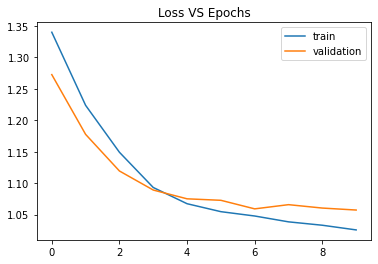

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



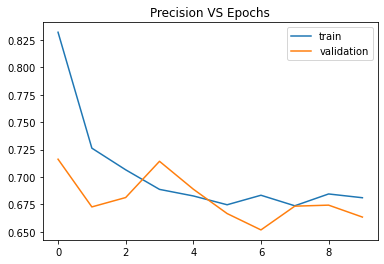

In [ ]:
epochs = history.epoch
precision = history.history["precision"]
val_precision = history.history["val_precision"]


plt.plot(epochs, precision, label="train")
plt.plot(epochs, val_precision, label="validation")

plt.legend()
plt.title("Precision VS Epochs")

plt.show()



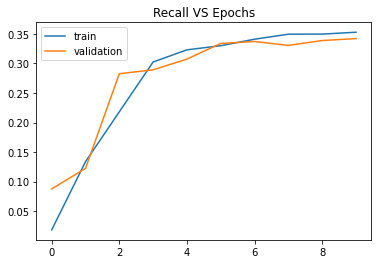

In [ ]:
epochs = history.epoch
recall = history.history["recall"]
val_recall = history.history["val_recall"]


plt.plot(epochs, recall, label="train")
plt.plot(epochs, val_recall, label="validation")

plt.legend()
plt.title("Recall VS Epochs")

plt.show()



**Observe**

After 10 epochs:
- the model still having a high loss
- Along with that Precision is 68 %

The only thing the model improved upon:
- Is on the Recall which reached 35 %




#Orthogonalization

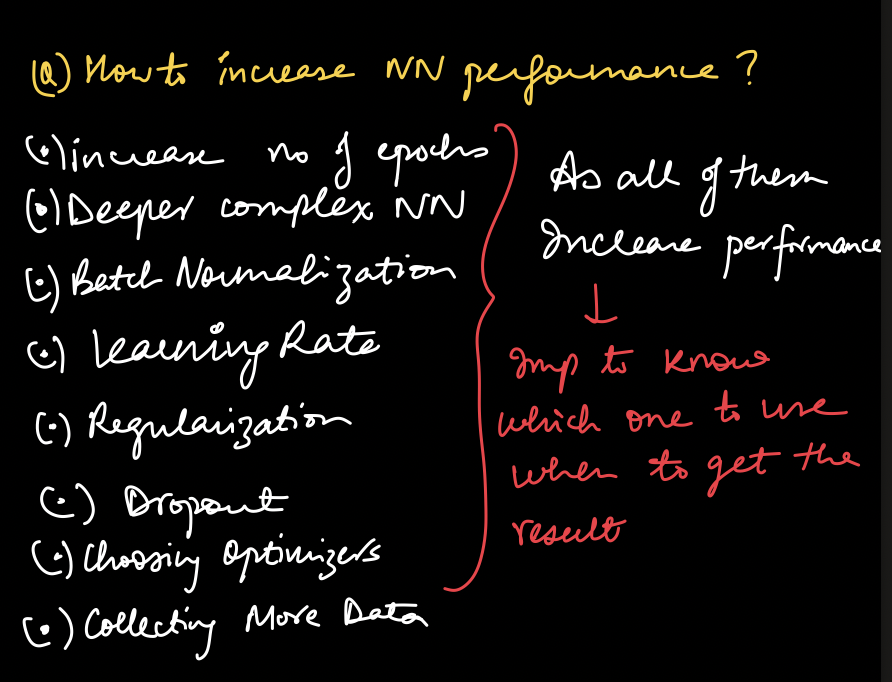

#### What all can be done to make the model perform better ?

Ans: there are many things that can be done to the baseline model like:
- Training for more epochs
- Trying a Deeper Neural Network
- Adding L2 Regularization
- Using Batch Normalization
- Trying Dropout
- Simply Changing the NN Architecture
- Or finally Collecting more data

<br>

**Note:** Its really important to know what to try from all of this:
- in order to achieve the desire outcome
- Or else, you will spend months experimenting, and never getting any results

This process of knowing what to tune in order to achieve one effect is callewd **Orthogonalization**

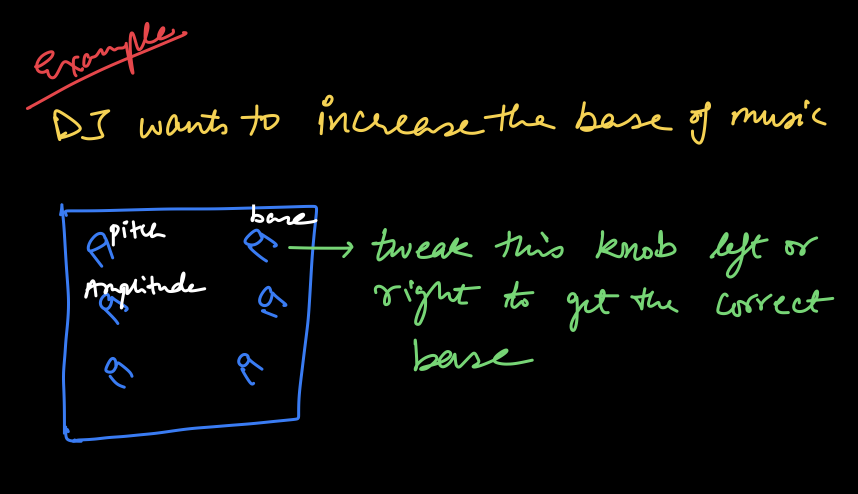





<br>

Lets take an example to better understand this:

Imagine a **DJ mixer** and all its knobs

- Notice how one knob controls the pitch of the audio
- One knob controls Amplitude of the audio
- One knob increases Bass of audio
<br>

Similarly, all these ideas of improving the model performance becomes the knobs:
- Hence its important to know what to tune
- and by how much to get the model to perform better



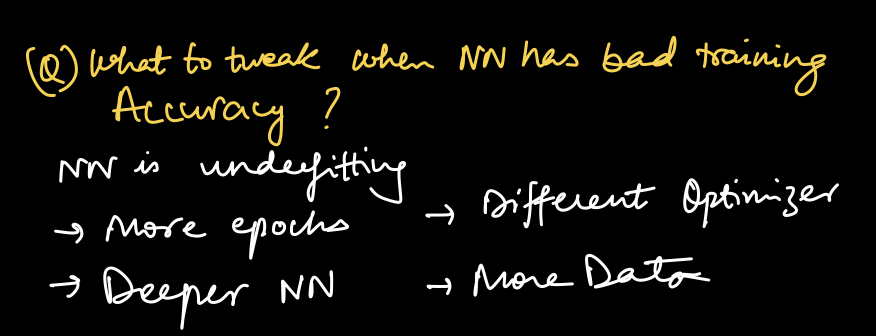

#### Now if the model, does not fit well on the training set, what to do ?
Ans: Bigger Network or use a different Optimizer (Preferably Adam)



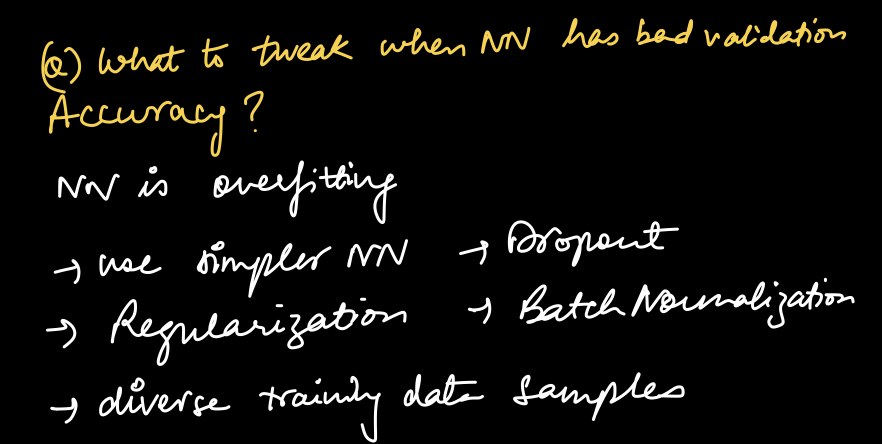

#### What if the model fits well on the training data but performs poorly in Validation set?

Ans: clearly its the case of **Overfitting**, hence:
- Regularization should be used
- Also, getting a bigger training data with diverse sample works

#### What is diverse sample in training data ?
Ans: The new samples should be completely different from the original training set



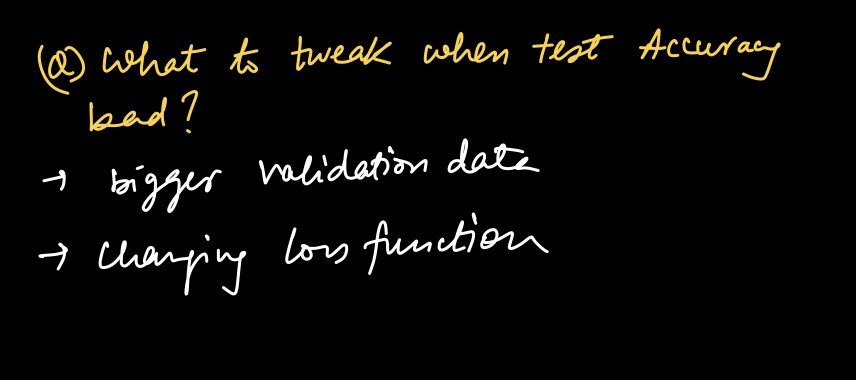


#### What if the model fits well on the training and validation data but performs poorly in test set?
Ans: Though the chances of this happening is very low, but if it does happen:

- Try getting a bigger validation data
- Or change the Loss function of the model






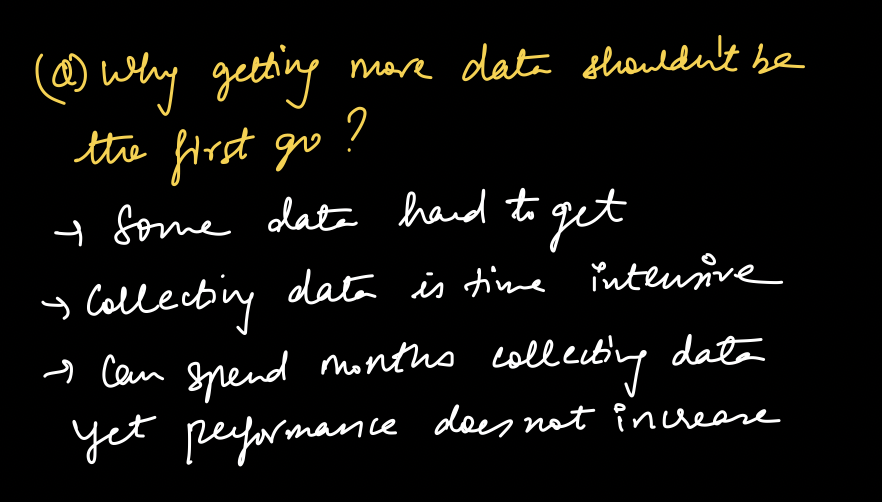

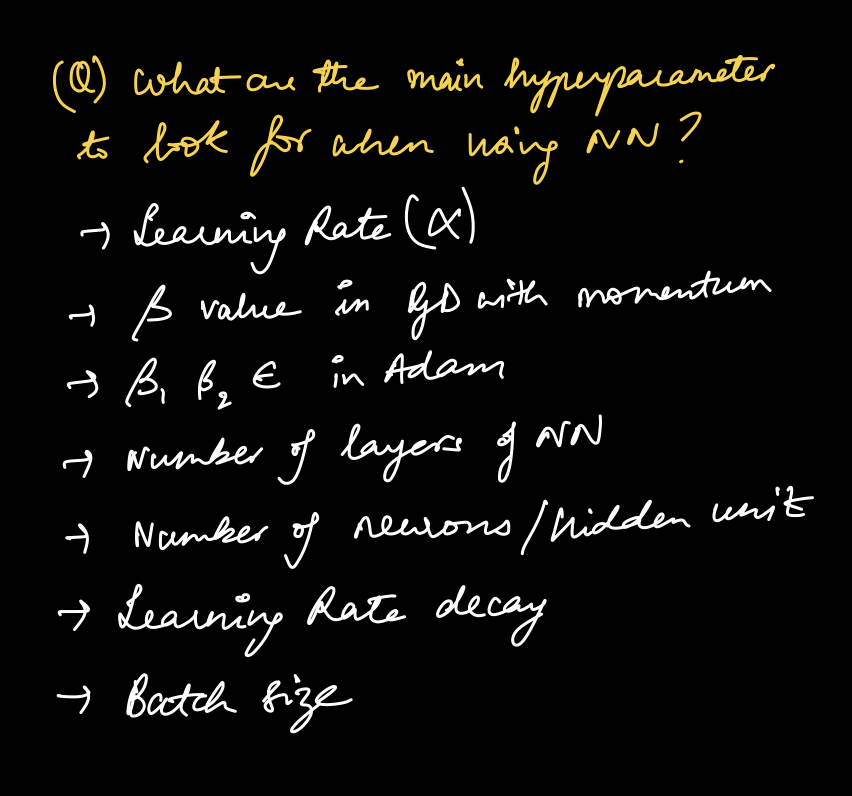

#### What are the main hyperparameters to look at when using a NN ?

Ans: the main hyperparameters includes:

- Learning rate $\alpha$

- $β$ if using Gradient Descent with Momentum

- $β_1, β_2, ϵ$ when using Adam

- Number of layers of the NN

- Number of Neurons/ hidden units to be used

- Learning Rate decay

- Batch size  




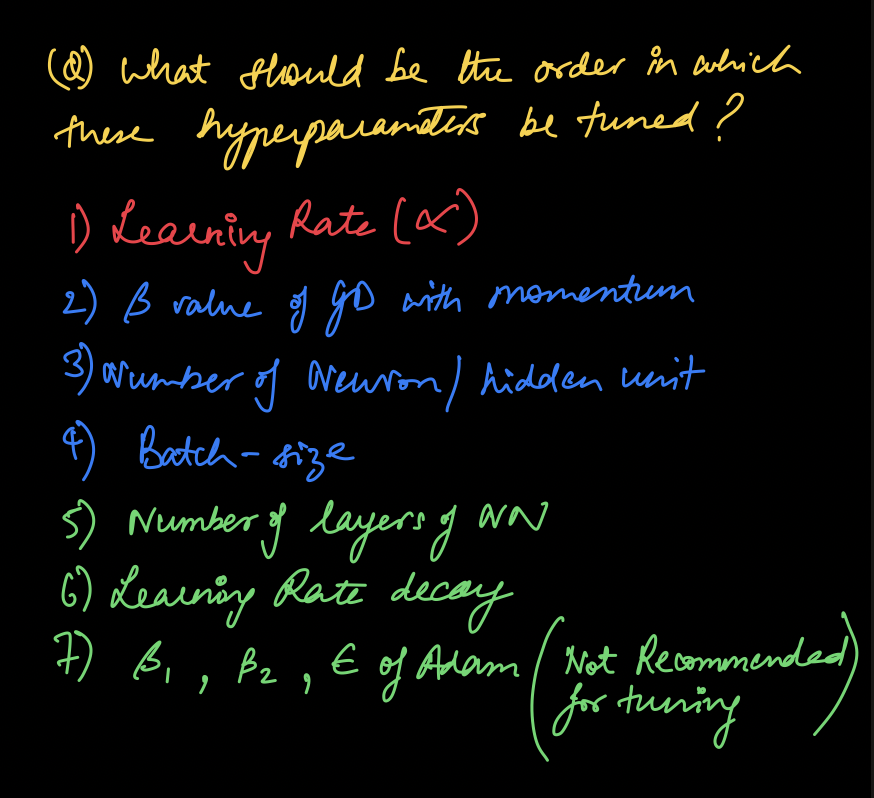

#### But amongst all these hyperparameters, which one to tune first ?

Ans: Learning Rate $α$ ,
- since most of the time, due to an incorrect $α$
- the model fails to reach global minima

<br>

After the learning rate $α$, the next hyperparameters to tune should be :

- **$β$ value**: though a value of 0.9 is a good default for it

<br>

- **Number of neurons/hidden units**: As it helps in making the model more complex

<br>

- **Batch size**: Finding the right batch size, so that there is equal distribution of the data in every epoch


<br>

And finally the  hyperparameters which are last to tune will be :

- **Number of Layer of the NN** : As adding layers changes the NN entirely, it should be considered as the final resort

<br>

- **Learning Rate Decay**: If after getting the best learning rate, still the model does not perform, its a good practice to perform a decay of learning rate over epochs

<br>

- **$β_1, β_2, ϵ$ when using Adam**: Though not recommended to tune, but sometimes tuning these value help model converge to the global minima



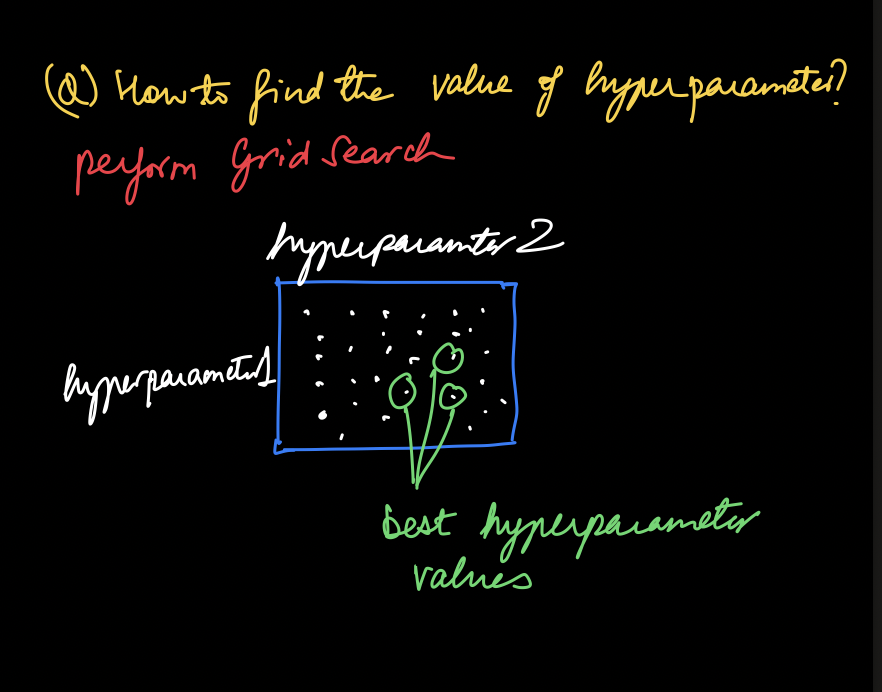

#### How to find the value of hyperparameter ?

Ans: Perform Grid Search  

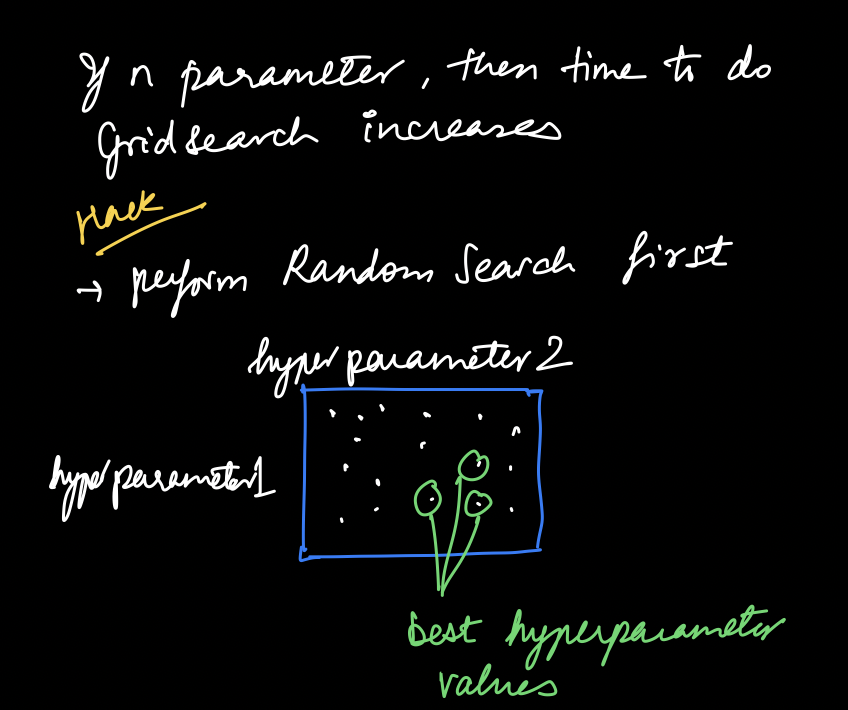

#### What if there are N hyperparameters, will grid search be the right approach then ?

Ans: No, as the hyperparameters increases so does the time of Grid Search

- Hence to avoid it there is a hack to peform
- Try RandomSearch first to get the best hyperparameter values

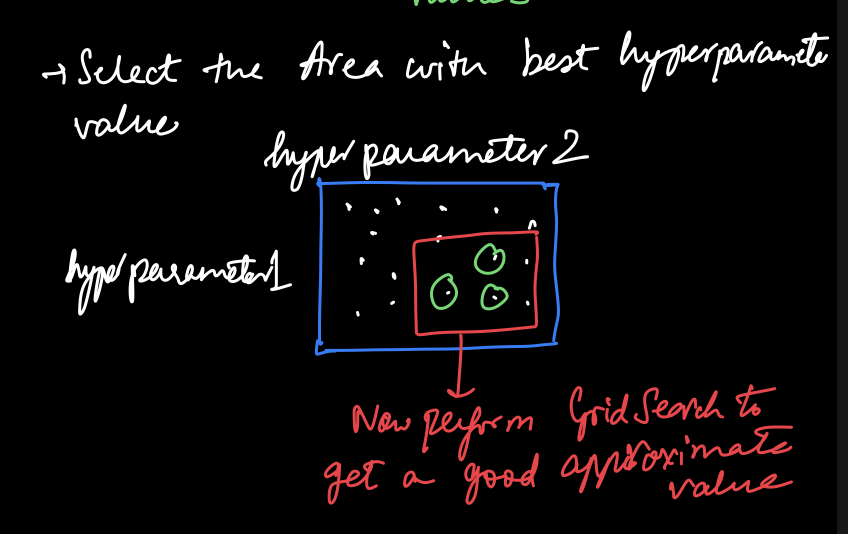

After Random Search,
- Then select the region/area of the best hyperparameter
- And perform Grid search on the selected region
- to have a good approximate value of the hyperparameters to be used

#Single Evaluation Metric

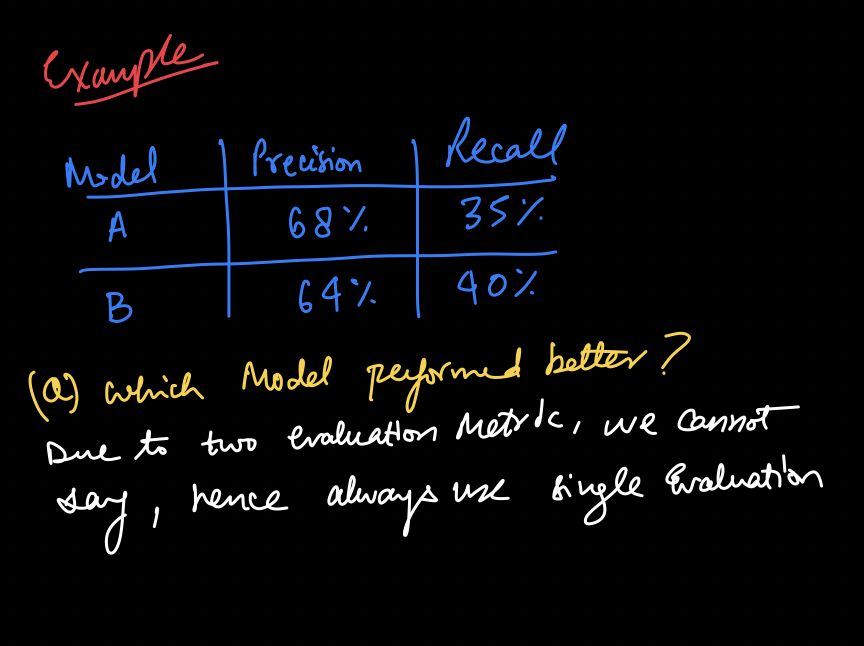

Notice that, in our model, we used two metrics Precision and Recall

- And the baseline model (Calling it Model A)
got Precision = 68% and Recall = 35%

<br>

If there is another model (Model B), such that:
- Precision = 64% but Recall = 40%

<br>

#### Can we say Model A performed better or Model B ?
Ans: No


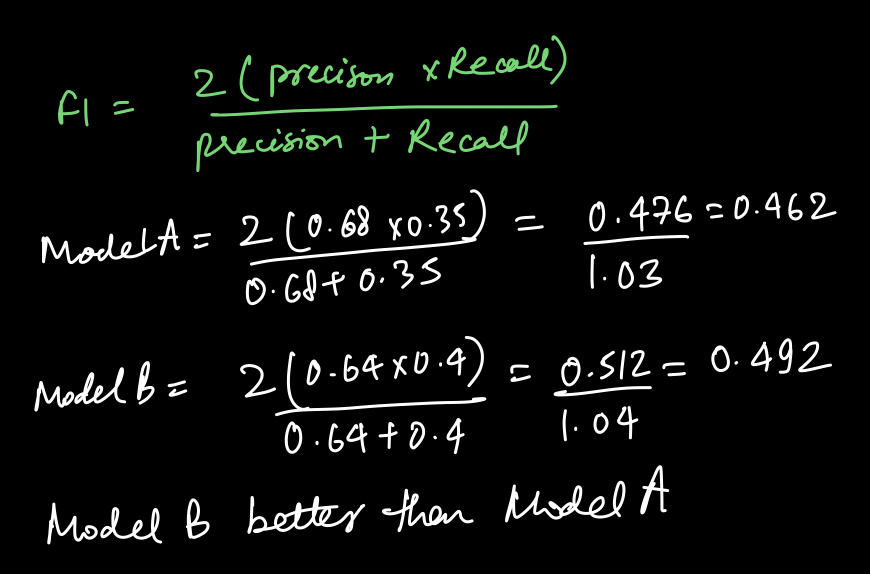


#### How about we use F1-Score instead, will that help ?

Ans: Yes, as:
- $F1Score = \frac{2 Precision \times Recall}{Precision + Recall}$

Therefore
- F1 for modelA : $\frac{2 \times 0.68 \times 0.35}{0.68 + 0.35} = \frac{0.476}{1.03} = 0.462$

<br>

- And F1 for ModelB : $\frac{2 \times 0.64 \times 0.40}{0.64 + 0.40} = \frac{0.512}{1.04} = 0.492$


**observe**

How combining Precision and Recall in the form of F1Score,
- Shows that Model B performs better than Model A
- Even though Model A has higher Precision than Model B

<br>

**Note:** hence its always a good practice to use a single Evaluation Metric or combine metrices   




#### What if we cannot combine the metrices together ?

Ans: Lets take an example to understand it:

Suppose we have three models(A,B,C) , such that:


| Model | F1Score | Training Time |
| :-- | :--| :--|
|A| 80% | 100ms |
|B| 92% | 180ms |
|C|95%|250ms|

Now, we want a model
- which has maximum F1score and minimum Training time.

Clearly we cannot combine F1Score and Training Time together

<br>

Now what if we select the model:

- Which has the maximum F1Score
- Such that Training Time $\leq$ Threshold($\tau= 200$ ms)

<br>

#### Which will be the best model ?

Ans: Model B

<br>



#### Imagine if we have N Metrics which cannot be combined, then what to do ?

Ans: Consider 1 metric on which we want to the model to have maximum value in

- While conditioning the model on the remaining N-1 Metrices


**Note:** The metric:
- on which the model maximizes itself is called Optimizing metric
- while the metric/metrices on which conditions are applied are called Satisificing metric










**Quiz**

```
if there are 3 evaluation metrics for 2 models such that M1 = [0.78, 0.88], M2 = [0.82, 0.67] M3 = [0.66, 0.33]

and we want to have maximum M1, M3 and mininum M2, then:

1. M1 should be the Satisfying metric
2. M2 should be the Satisfying metric
3. M3 should be the Satisfying metric

```
**Answer**
3. M3 should be the Satisfying metric

Now that we understand importance of a single Evaluation Metrics
- Lets implement F1 Score

**Note**: Keras does not have F1 score as metric

<br>

Therefore we will be using [Tensorflow's addons](https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/F1Score) for F1

In [ ]:
!pip install tensorflow-addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 30.6 MB/s 


In [ ]:
import tensorflow_addons as tfa


Using F1 score as metrics

In [ ]:
model = create_baseline()

f1 = tfa.metrics.F1Score(4,'micro')

model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(), metrics=[f1]  )


training model for 10 epochs with batch size = 128

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128)


Epoch 1/10
43/43 [==============================] - 1s 9ms/step - loss: 1.3087 - f1_score: 0.3721 - val_loss: 1.2346 - val_f1_score: 0.3917
Epoch 2/10
43/43 [==============================] - 0s 4ms/step - loss: 1.1930 - f1_score: 0.4367 - val_loss: 1.1576 - val_f1_score: 0.4678
Epoch 3/10
43/43 [==============================] - 0s 4ms/step - loss: 1.1337 - f1_score: 0.5207 - val_loss: 1.1073 - val_f1_score: 0.5157
Epoch 4/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0984 - f1_score: 0.5315 - val_loss: 1.0940 - val_f1_score: 0.5058
Epoch 5/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0752 - f1_score: 0.5381 - val_loss: 1.0825 - val_f1_score: 0.5041
Epoch 6/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0633 - f1_score: 0.5391 - val_loss: 1.0690 - val_f1_score: 0.5339
Epoch 7/10
43/43 [==============================] - 0s 4ms/step - loss: 1.0536 - f1_score: 0.5464 - val_loss: 1.0569 - val_f1_score: 0.5223
Epoch 8/10
43/43 [==

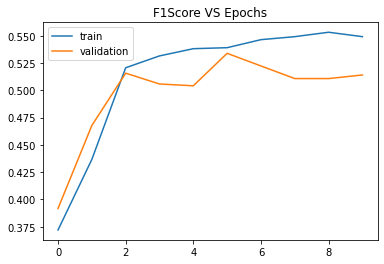

In [ ]:
epochs = history.epoch
f1_score = history.history["f1_score"]
val_f1_score = history.history["val_f1_score"]


plt.plot(epochs, f1_score, label="train")
plt.plot(epochs, val_f1_score, label="validation")

plt.legend()
plt.title("F1Score VS Epochs")

plt.show()



**Observe**

Just by using F1Score, we can better understand that
- the model performance much clearly




<br>

With this lets check the performance of the model on the test data


In [ ]:
import sklearn

from sklearn.metrics import f1_score

In [ ]:
y_pred = model.predict(X_test)

# y_test was One hot Encoded , y_pred had probabilities,
# Hence converting them to labels for MultiClass F1 Calculation
f1_score(np.argmax(y_test.values,axis=1),np.argmax(y_pred,axis=1),average='micro')

21/21 [==============================] - 0s 2ms/step


0.5089285714285714

**Observe**

The model has similar results to Validation dataset
- Because of the fact, the distribution of Validation and Test data is same

<br>

Imagine if the validation data had indian customers information
-  while test data had UK Customers information

#### Can we now rely on the results of Test and validation set ?

Ans: No, Clearly because:
- The people in India and UK live in completely different scenarios
- Meaning the distribution for both the test and validation set becomes entirely different

<br>

#### How to make the distribution same in test and validation set ?
One hack here:
- Is to make sure to have samples of UK in the validation data and Indian samples in test data





# Human level Performance

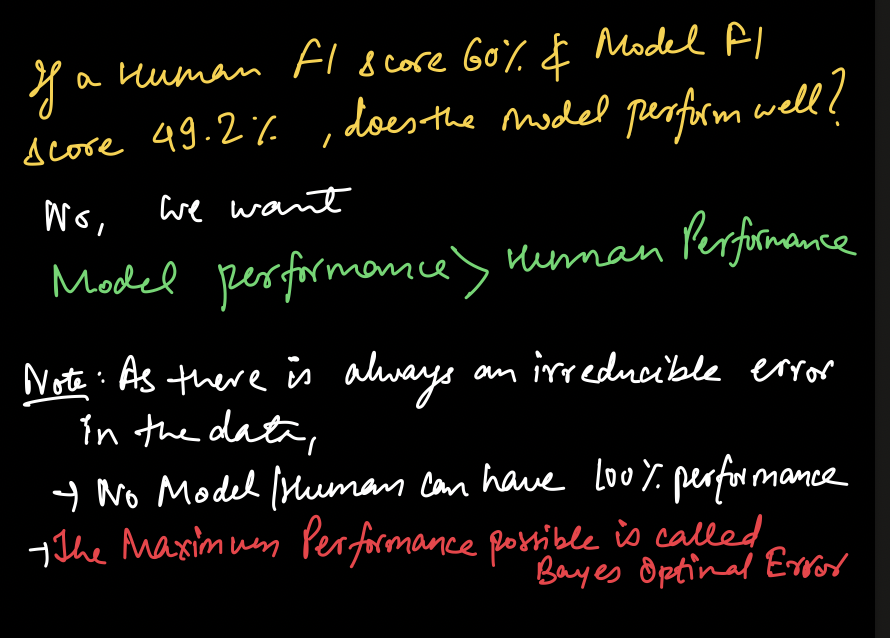

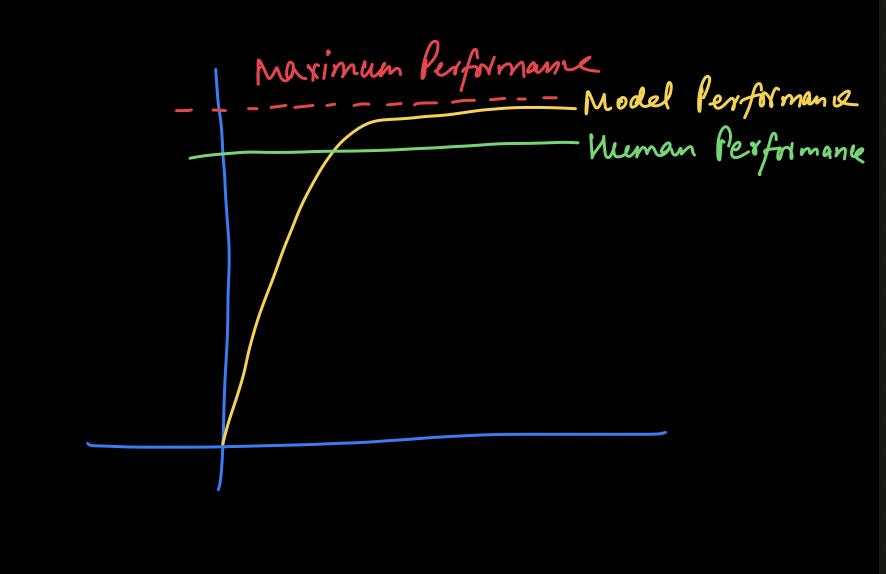

**observe**

That model achieved an F1 Score of 52%

<br>

#### Did the model perform good by achieving a 52% F1 score ?
Ans: If we consider a mean model , then

- F1Score for 4 class will Approx be:  $ \frac{1}{4} \times 100 = 25 $%

Thus showing the model performs quite well on the data


<br>

#### But what if when a human tries to classify, he recieves an F1 score of 60%, will then the model said to have a good perfromance ?

Ans: No, we always want
- the model to have a high performance on metric than human

Even though the model is better than a mean model,
- its always a good practice to compare model performance with a human performance

<br>


**Note**: The maximum performance or the least error that can be attained for a problem is called  a Bayes Optimal Error









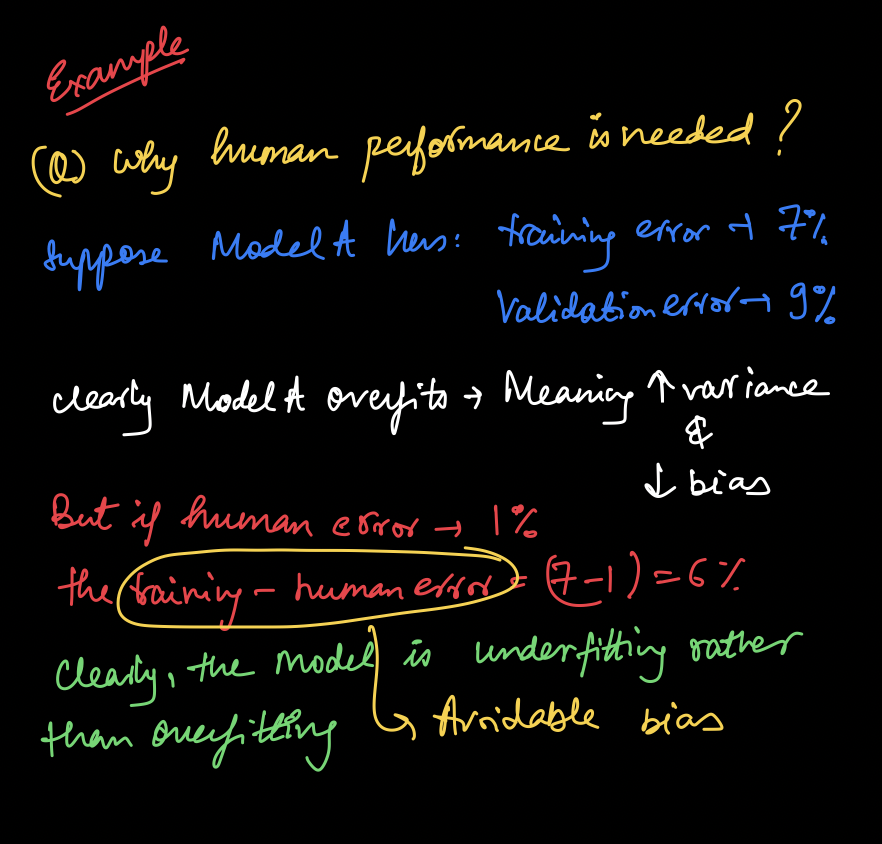

#### Why compare to human level performance ?
Ans: As Humans tend to do many tasks effeciently and with precise accuracy
- For example classifying different brands of cars, voice recognition

- Also it helps the model Bias Variance tradeoff

<br>

#### how human level performance helps in Bias Variance of the model ?
Ans: Lets understand this with an example:

Supposedly we try to classify maruti cars from honda

- Now Human error is 1% while the model's training error is 7% and validation error is 9%

Now if we had only training and validation error,
- we would have said the model is overfitting meaning it has high variance
- and we should focus on variance

<br>

But due to the high gap between human error and model training error $(7-1)$% $= 6$%,
- Shows that the model is not fitting the training data well
- meaning the model is having a high bias
- showing that we should focus on bias

<br>

#### What if there are blur images such that Human error increases to 5.5 % and the model error remains same ?
Ans: As the training error and human error is quite close,
- it shows that the model is fitting well on the training data

But as validation error is more than training error,
- it means that the model has high variance

<br>

Hence the model should focus on Variance

<br>

**Note:** The difference/gap between Human and Training error is called **Avoidable Bias**
- Also for this example Human-level error is used as a proxy for Bayes optimal error

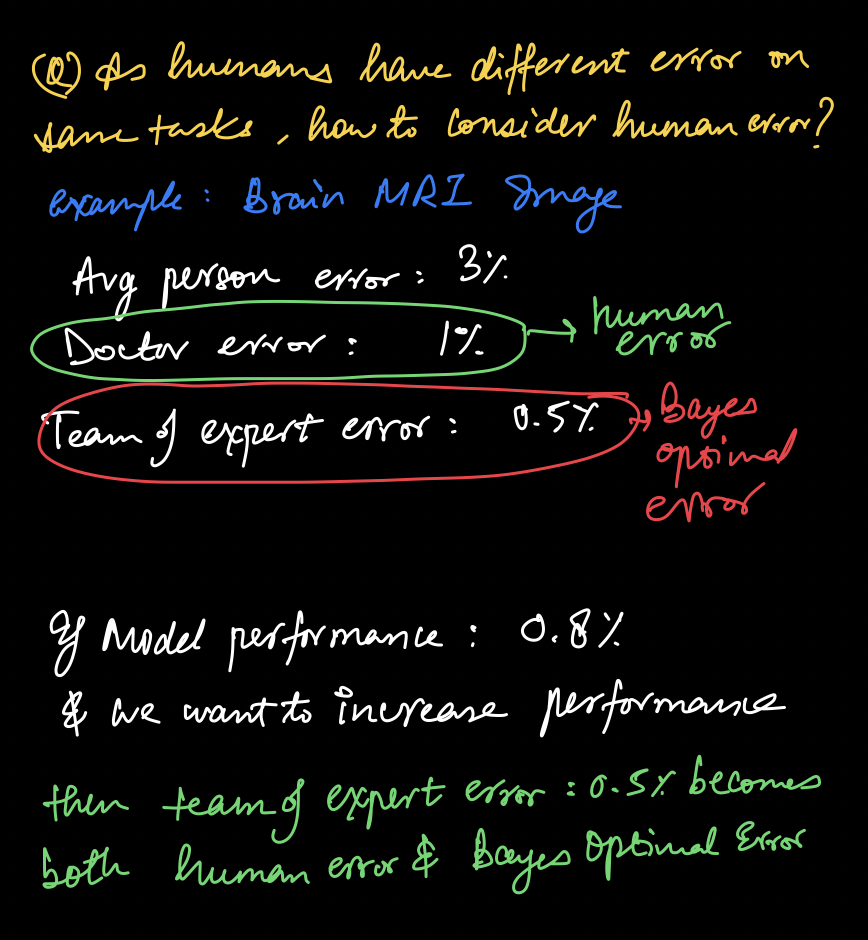

#### As human tend to have different errors when performing a task, then which human error to be considered as Bayes error ?

Ans: Lets take an example

Imagine we have a Brain MRI image to check if the patient has tumor or not

Now Suppose :
- lay-man error is 3%
-  a doctor has 1 % error
- and a team of expert doctors has 0.5 % error

#### Then which one can be considered as human error ?
Ans: Since a doctor is in the field of study,
- we should consider 1% as human error

<br>

#### What will be the bayes optimal error ?
Ans: The 0.5% error of the  team of expert doctor



#### Can Bayes optimal error not be used as Human error ?
Ans: yes it can be, lets understand it with an example:

<br>

Suppose:
- the Human error taken = 1%,
-  Bayes Optimal Error = 0.5%
- and the model training error = 0.7% while validation error = 0.8%

<br>

Here we see, that the model is performing quite well on the dataset

<br>

Now if we desire to further increase model performance,
- We make Bayes Optimal Error $ = $ Humann error = $ 0.5 %$ ,

- Thus making the model to do bias reduction more before variance reduction
- In order to make model perform much better



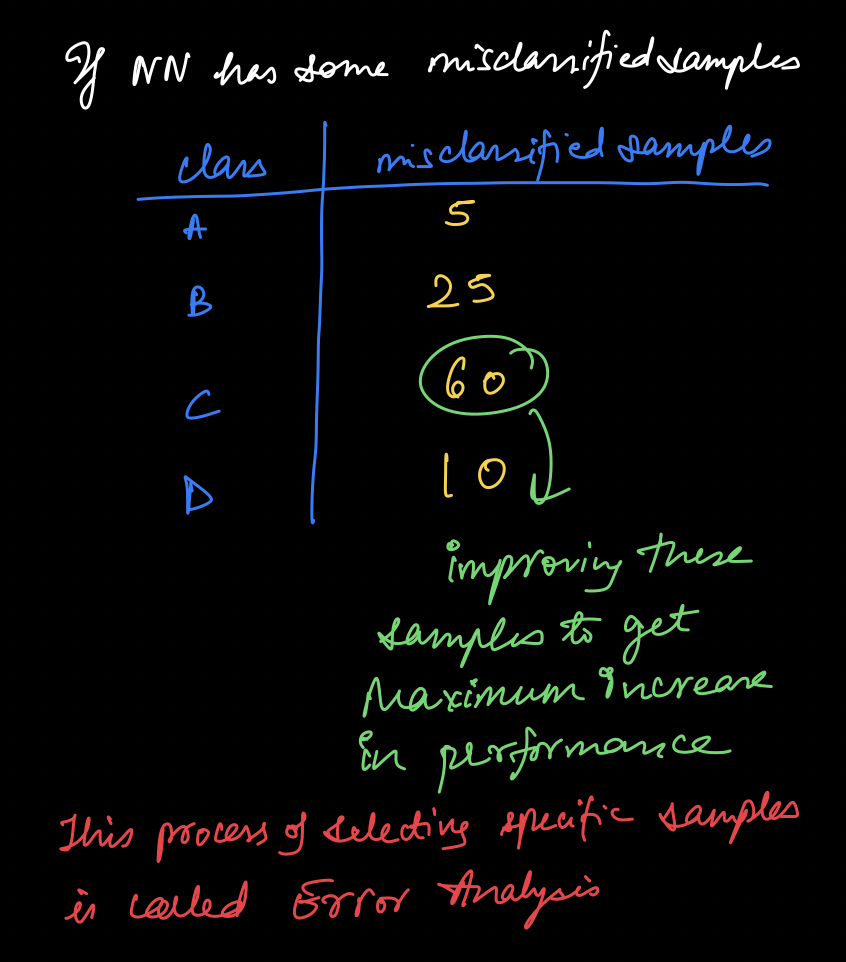

now imagine after doing every possible hyperparameter tuning,
- the model performance just improves slightly

#### Then what to do to make the model perform better ?

Ans: To manually look for the cause of error and try resolving it

**Note:** this process of manual analysis is called error analysis
<br>

#### how one can perform error analysis ?
Ans: By taking some misclassified samples of validation set,  
- and counting samples for each class
- This count gives an idea of what percentage of the classes are misclassifed
- And solving which class samples, to reduce the error drastically.


<br>

lets take an example to understand it :

Suppose in our data
-  5 samples of class A,
- 25 samples of class B,
- 60 samples of class C
- and 10 samples of class D are misclassified .


#### Which class to work upon the most ?

Ans: Class C, since correcting all the 60 samples
- Will reduce your error by 60%


Also apart from just correcting class C samples,
- You can parallely work on fixing misclassified Class B samples
- Which furthur reduces the error

